In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('The shape of training data is ',train.shape)
print('The shape of testing data is ',test.shape)

The shape of training data is  (1460, 81)
The shape of testing data is  (1459, 80)


In [3]:
# Combined training and testing dataset
combined = pd.concat([train,test])
del train
del test

In [4]:
cols = combined.columns.values
cols

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolAre

To understand the data, we can look at each variable and understand what information it represents and the
characterestics of each information

We will go in the same order as in the file data_description.txt

In [5]:
L = pd.DataFrame(columns = ['Variable','Type','Segment','Variable_Importance','Comments'])

Inspiration from this is taken from  https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/code<br>


__Variable Name__: Name of the variable <br>
__Type__: Four types of possibilities exist. Numeric, Ordinal Categorical, Nominal Categorical and combination of nominal and ordinal categorical <br>
__Segment__: The variables are of three segments: building, space or location. 'Building' refers to the physical characteristics of the building. 'Space' refers to variable that reports space properties of the house. 'Location gives us information on where the house was located <br>
__Variable_Importance__: Our expectation on the influence/impact of variable influence on the target variable 'SalePrice'. We can use categorical scale with 'High', 'Medium' and 'Low' as possible values. <br>
__Comments__: Any comments. Any sort of data cleaning or data transformation performed will be mentioned here

In [6]:
def Exploration(coloumn):
    print('The number of unique value in the dataset is/are, ',len(combined[coloumn].unique()))
    print('There are', combined[combined[coloumn].isnull()].shape[0], 'missing records')
    print('Total number of records are ', len(combined))
    return

def One_Hot_Encoding(coloumn):
    global combined
    combined = pd.concat([combined,pd.get_dummies(combined[coloumn],prefix = coloumn)],axis=1)
    combined.drop([coloumn],axis=1,inplace=True)
    return

def Label_Encoding(coloumn):
    global combined
    le = LabelEncoder()
    le = le.fit(combined[coloumn])
    combined[coloumn] = le.transform(combined[coloumn])
    return
    
def Replace_Missing_with_Mode(coloumn):
    global combined
    combined[coloumn][combined[coloumn].isnull()] = combined[coloumn].mode()[0]
    return

def Replace_Missing_with_Median(coloumn):
    global combined
    combined[coloumn][combined[coloumn].isnull()] = combined[coloumn].median()
    return

def Replace_Missing_with_Mean(coloumn):
    global combined
    combined[coloumn][combined[coloumn].isnull()] = combined[coloumn].mean
    return

def Replace_Missing_with_Specific_Number(coloumn,value = 0):
    global combined
    combined[coloumn][combined[coloumn].isnull()] = 0
    return

def Scaling(coloumn):
    global combined
    combined[coloumn] = scale(combined[coloumn])

def Add_Entry(Variable = None, Type = None, Segment = None, Variable_Importance = None, Comments = None):
    global L
    temp = pd.DataFrame([[Variable,Type,Segment,Variable_Importance,Comments]],columns = L.columns.values)
    L = L.append(temp)    
    return

In [7]:
target = 'SalePrice'

# 1: MSSubClass

In [9]:
variable = 'MSSubClass'

In [10]:
Exploration(variable)

The number of unique value in the dataset is/are,  16
There are 0 missing records
Total number of records are  2919


In [11]:
sorted(combined[variable].unique())

[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190]

This means that this is a categorical varibale.
The description file tells us what each variable indicates.

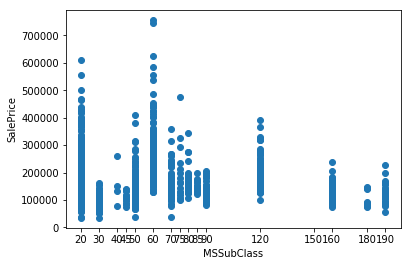

In [12]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.xticks(sorted(combined[variable].unique()))
plt.show()

There doesn't seem to be any particular ordinal relationship between MSSubClass and Sale Price \n
Hence we classify this as a nominal categorical variable

We perform one-hot encoding on this variable

In [13]:
One_Hot_Encoding('MSSubClass')

In [14]:
Add_Entry(variable, 'Nominal Categorical', 'Building','Medium','Performed One-Hot Encoding')

# 2: MSZoning

In [15]:
variable = 'MSZoning'

In [16]:
Exploration(variable)

The number of unique value in the dataset is/are,  6
There are 4 missing records
Total number of records are  2919


In [17]:
combined[variable].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

This is clearly categorical varible.<br>
However from the data description we can see that some are ordinal while some are nominal <br>
RH,RM,RL => Ordinal Variable Combination<br>
Others => Nominal Variable Combination<br>

ALSO...<br>
There are missing values!

In [18]:
combined[combined[variable].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
455,810,0,0,NaN,1,1Fam,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
756,733,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
790,1150,686,0,NaN,4,1Fam,TA,No,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1444,1600,0,0,NaN,3,1Fam,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
combined[variable].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

For now let's just replace with the mode i.e. RL

In [20]:
combined[variable][combined[variable].isnull()] = 'RL'

In [21]:
combined[variable].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

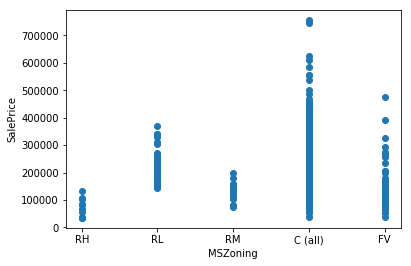

In [22]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.xticks(combined[variable].unique())
plt.show()

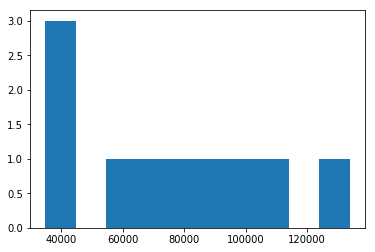

In [54]:
plt.hist(combined[combined[variable]=='C (all)'][target].values[:10])
plt.show()

Bleh! :P

In [56]:
One_Hot_Encoding(variable)

In [57]:
Add_Entry(variable, 'Nominal Categorical', 'Building','Low','Replaced 4 missing values with maximum occuring values and Performed One-Hot Encoding')

# 3: LotFrontage

In [59]:
variable = 'LotFrontage'

In [60]:
Exploration(variable)

The number of unique value in the dataset is/are,  129
There are 486 missing records
Total number of records are  2919


This is a continious variable.

The skewness of the Lot Frontage is  1.5032778146412304
The kurtosis of the Lot Frontage is  11.295920645765037


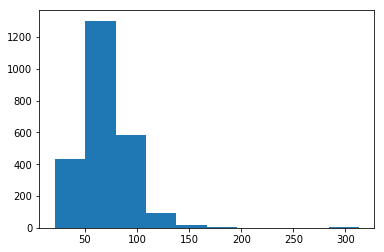

In [61]:
print('The skewness of the Lot Frontage is ', combined.LotFrontage.skew())
print('The kurtosis of the Lot Frontage is ', combined.LotFrontage.kurtosis())
plt.hist(combined[combined['LotFrontage'].notnull()][variable])
plt.show()

We will just normalize the data so that it does not create a bias in the cost function

In [62]:
print('There are', combined[combined['LotFrontage'].isnull()].shape[0], 'missing records')
print('There are total ',combined.shape[0],' records')

There are 486 missing records
There are total  2919  records


This means that almost 25% of the entries are missing. <br>
Here replacing simply by median/mean does not seem like a smart approach. <br>
But before deleting, we should observe the imfluence of this variable on our target variable

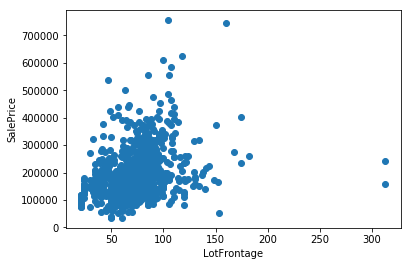

In [63]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

The outliers have messed up the graph. Lets just observe when Lot Frontage > 150

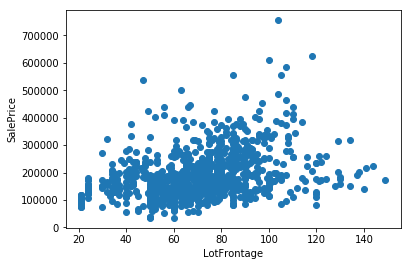

In [64]:
plt.scatter(combined[combined[variable] < 150][variable],combined[combined[variable] < 150][target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

Influence is present. But we delete for now

### Come back to this later

In [65]:
combined.drop(['LotFrontage'],axis=1,inplace=True)

In [66]:
Add_Entry(variable, 'Continious', 'Building','Low','With low influence we decided to drop the coloumn')

# 4: LotArea

In [67]:
variable = 'LotArea'

In [68]:
Exploration(variable)

The number of unique value in the dataset is/are,  1951
There are 0 missing records
Total number of records are  2919


No Misssing Values! sweet!

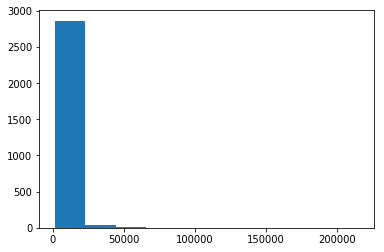

In [69]:
plt.hist(combined[variable])
plt.show()

Wow. This data has some weird outliers for sure. <br>
Let us explore

In [70]:
combined['LotArea'].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

Before we take any steps to remove or rectofy outliers, we should observe the impact on the target variable

I want to know if the data is normally distributed (after removing some outliers)

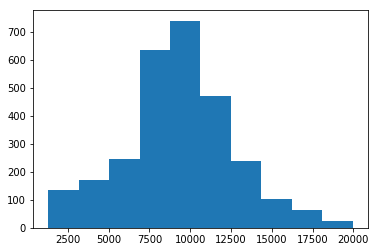

In [71]:
plt.hist(combined[combined[variable] < 20000][variable])
plt.show()

In [72]:
temp = combined[combined.SalePrice.notnull()][['LotArea','SalePrice']]
print('The length of observation data is ',len(temp))

The length of observation data is  1460


In [73]:
temp.head()

,LotArea,SalePrice
0,8450,208500.0
1,9600,181500.0
2,11250,223500.0
3,9550,140000.0
4,14260,250000.0


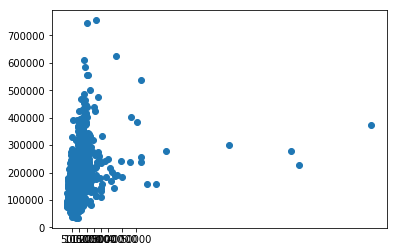

In [74]:
plt.scatter(temp['LotArea'],temp['SalePrice'])
plt.xticks([5000,10000,15000,20000,25000,30000,40000,50000])
plt.show()

The skewness of the Lot Area is  0.521806816405387
The kurtosis of the Lot Area is  1.27497194384435


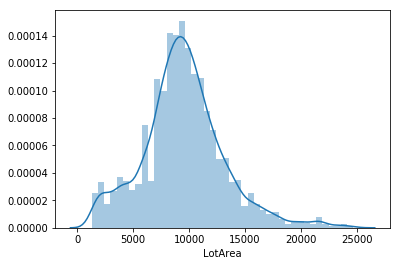

In [83]:
plot = combined[combined[variable] < 25000][variable]
print('The skewness of the Lot Area is ', plot.skew())
print('The kurtosis of the Lot Area is ', plot.kurtosis())
sns.distplot(plot)
plt.show()

Skewness and Kurtosis for the above limit is in range. Hence, we can pull all the values greater than 25000 to  mean + 1.97 std (95th confidence interval)

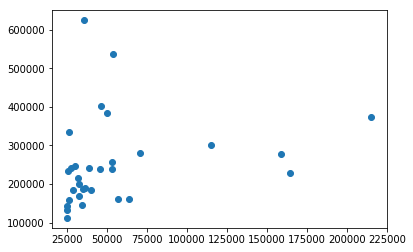

In [84]:
plt.scatter(combined[combined[variable] > 25000][variable],combined[combined[variable] > 25000][target])
plt.show()

So there is a relationship between the Lot Area and Sale Price when the values are between 25000 and 75000

In [85]:
mean = plot.mean()
std = plot.std()

In [86]:
combined[variable][combined[variable] > 25000] = 25000

In [87]:
Add_Entry(variable, 'Continious', 'Building','Low','Identified 25000 to have the data as normal (within kurtosis and skewness range). Put 25000 as the value for all greater than 25000')

# 5: Street

In [89]:
variable = 'Street'

In [126]:
Exploration(variable)

KeyError: 'Street'

Niceeee!<br>
From the data description we can see that these are nominal categorical data types <br>
We will perform one-hot encoding on this coloumn

In [91]:
combined[variable].unique()

array(['Pave', 'Grvl'], dtype=object)

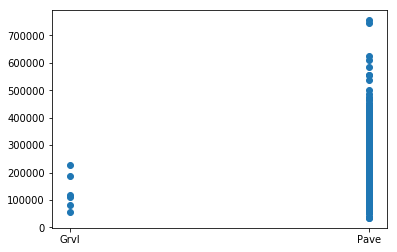

In [92]:
plt.scatter(combined[variable],combined[target])

Number of values for Pave seems awefully more than Grvl
Lets see the value counts

In [93]:
combined[variable].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

Damn Son!

The skewness of the  Street  is  0.521806816405387
The kurtosis of the  Street  is  1.27497194384435


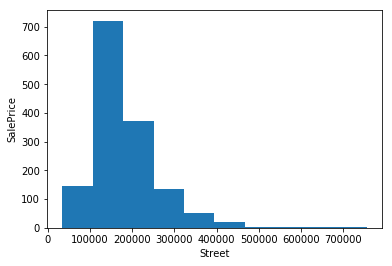

In [120]:
print('The skewness of the ' ,variable,' is ', plot.skew())
print('The kurtosis of the ' ,variable,' is ', plot.kurtosis())
plt.hist(combined[combined[target].notnull()][combined[combined[target].notnull()][variable] == 'Pave'][target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

Gravel by dictionary means: a loose aggregation of small water-worn or pounded stones
Paved by dictionary means: cover (a piece of ground) with flat stones or bricks; lay paving over.
    
This is clearly a ordinal categorical variable
But the data is very skewed. So the influence will be less obvious

In [125]:
combined[combined[variable] == 'Grvl'][variable] = 1
combined[combined[variable] == 'Pave'][variable] = -1

KeyError: 'Street'

In [122]:
Add_Entry(variable, 'Ordinal Categorical', 'Building','Low','The variable has Pave(2907) and Grvl(12). I am doubtful of the impact on prediction')

# 6: Alley

In [127]:
Exploration('Alley')

KeyError: 'Alley'

Now you might think - 'There is clearly no choice but to drop this coloumn' <br>
But hold on, from the data descrption we find that NA here refers to 'No Alley Access' and not as a 'missing value' <br> 

In [124]:
combined.drop(['Alley'],axis=1,inplace=True)

In [ ]:
Add_Entry(variable, 'Nominal Categorical', 'Building','Low','The variable has Pave(2907) and Grvl(12). I am doubtful of the impact on prediction')

# 7: Lot Shape

In [130]:
variable = 'LotShape'

In [131]:
Exploration(variable)

The number of unique value in the dataset is/are,  4
There are 0 missing records
Total number of records are  2919


No missing values! Sweet!

In [132]:
print(combined[variable].unique())

['Reg' 'IR1' 'IR2' 'IR3']


From the data description we can see that this is a ordinal category variable <br>
Hence we will proceed with two steps:<br>
Step I: Perform Label Encoding<br>
Step II: Normalize the values<br>

Before we perform label encoding, we need to understand the 'order' of our ordinal categorical variable

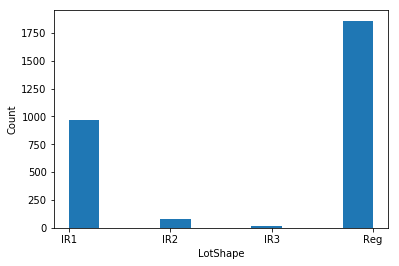

In [136]:
plt.hist(combined[variable])
plt.xlabel(variable)
plt.ylabel('Count')
plt.show()

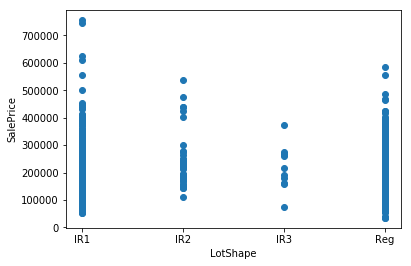

In [138]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

In [142]:
combined[variable][combined[variable] == 'Reg'] = 1
combined[variable][combined[variable] == 'IR1'] = 2
combined[variable][combined[variable] == 'IR2'] = 3
combined[variable][combined[variable] == 'IR3'] = 4
mean = (1+2+3+4)/4
combined[variable] = combined[variable] - mean

In [143]:
print('The value counts of the coloumn Lot shape is\n')
print(combined['LotShape'].value_counts())

The value counts of the coloumn Lot shape is

-1.5    1859
-0.5     968
 0.5      76
 1.5      16
Name: LotShape, dtype: int64


In [144]:
Add_Entry(variable, 'Ordinal Categorical', 'Building','Medium','I converted into numbers and made the value zero centered')

# 8: Land Contour

In [145]:
variable = 'LandContour'

In [146]:
Exploration(variable)

The number of unique value in the dataset is/are,  4
There are 0 missing records
Total number of records are  2919


In [147]:
combined[variable].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

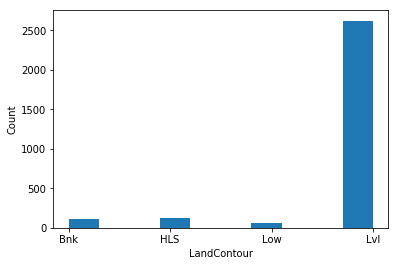

In [148]:
plt.hist(combined[variable])
plt.xlabel(variable)
plt.ylabel('Count')
plt.show()

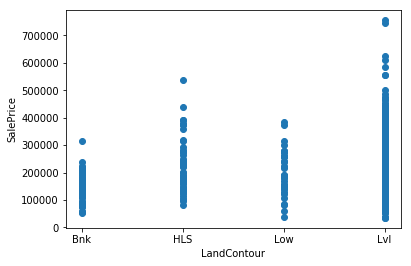

In [149]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

In [157]:
print(combined[combined[variable] == 'Lvl'][target].mean(skipna=True))
print(combined[combined[variable] == 'HLS'][target].mean(skipna=True))
print(combined[combined[variable] == 'Bnk'][target].mean(skipna=True))
print(combined[combined[variable] == 'Low'][target].mean(skipna=True))

180183.74675819985
231533.94
143104.07936507938
203661.11111111112


There does not seem to be a clear order in the ordinal variable. We treat this as nominal variable and perform one-hot encoding

In [159]:
One_Hot_Encoding(variable)

In [160]:
Add_Entry(variable, 'Nominal Categorical', 'Space','Medium','Treated a ordinal variable as nominal. Very skeptical of the impact on prediction. Check feature importance')

# 9: Utilities

In [172]:
variable = 'Utilities'

In [161]:
Exploration(variable)

The number of unique value in the dataset is/are,  3
There are 2 missing records
Total number of records are  2919


In [162]:
combined[combined[variable].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
455,810,0,0,1,1Fam,NaN,NaN,0.0,0.0,NaN,...,0,0,1,0,1,0,0,0,0,1
485,1474,0,0,3,1Fam,TA,No,0.0,0.0,Unf,...,0,0,1,0,0,1,1,0,0,0


In [163]:
combined.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

Wow! I did not see that coming. <br> 
It seems that almost all values point towards AllPub. Hence, we cannot gain any new insights from this coloum.<br>
So let's just drop this coloumn<br>

In [168]:
combined[combined['Utilities'] == 'NoSeWa']['SalePrice'].values[0]

137500.0

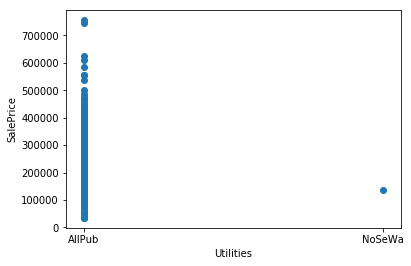

In [182]:
plt.scatter(combined[combined[target].notnull()][variable],combined[combined[target].notnull()][target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

# 10: LotConfig

In [187]:
variable = 'LotConfig'

In [188]:
Exploration(variable)

The number of unique value in the dataset is/are,  5
There are 0 missing records
Total number of records are  2919


No missing records! Sweet! 

In [189]:
combined.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

It is a bit debatable that the categorical variable type is ordinal or nominal. <br>
We will explore the column using some visualizations

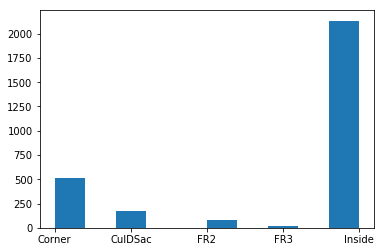

In [192]:
plt.hist(combined[variable])
plt.show()

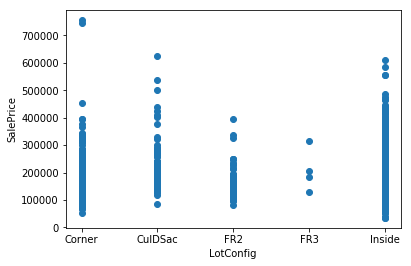

In [194]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

One-Hot Encoding it is!

In [196]:
One_Hot_Encoding('LotConfig')

# 10: LandSlope

In [200]:
variable = 'LandSlope'

In [201]:
Exploration(variable)

The number of unique value in the dataset is/are,  3
There are 0 missing records
Total number of records are  2919


In [203]:
combined[variable].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

On going through the data description, we identify that it is a ordinal categorical variable. <br>
We will plot a scatter plot between LandSlope and SalePrice to verfify our claim <br>

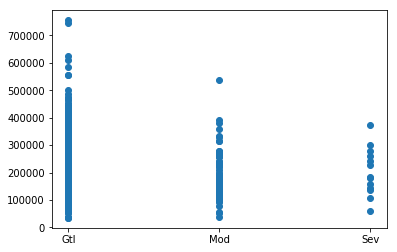

In [199]:
plt.scatter(combined.LandSlope,combined.SalePrice)
plt.show()

This shows a relationship that a typcial ordinal variable is expected to show

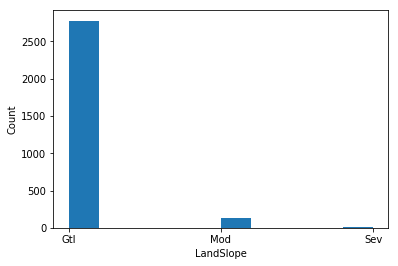

In [205]:
plt.hist(combined[variable])
plt.xlabel(variable)
plt.ylabel('Count')
plt.show()

The relationship is clearly ordinal, but value count is messed up!

For now we will just label-encoding

In [206]:
combined[variable][combined[variable] == 'Gtl'] = -1
combined[variable][combined[variable] == 'Mod'] = 0
combined[variable][combined[variable] == 'Sev'] = 1

In [208]:
combined[variable].value_counts()

-1    2778
 0     125
 1      16
Name: LandSlope, dtype: int64

In [207]:
Add_Entry(variable, 'Ordinal Categorical', 'Location','Medium','Data gives insights but the variable is very imbalanced')

# 11: Neighborhood

In [209]:
variable = 'Neighborhood'

In [210]:
Exploration(variable)

The number of unique value in the dataset is/are,  25
There are 0 missing records
Total number of records are  2919


No missing values, Sweet! :D

In [216]:
combined[variable].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

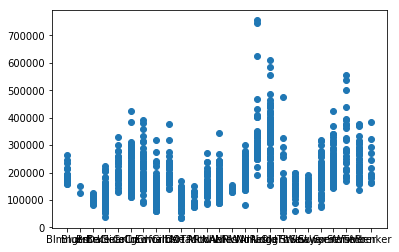

In [217]:
plt.scatter(combined[variable],combined[target])
plt.show()

In [ ]:
One_Hot_Encoding('Neighborhood')

__Note__: Something ingenius instead of one-hot encoding can be performed. Do explore

# 12: Condition1

In [219]:
variable = 'Condition1'

In [220]:
Exploration(variable)

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [221]:
combined.Condition1.unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [222]:
combined[variable].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

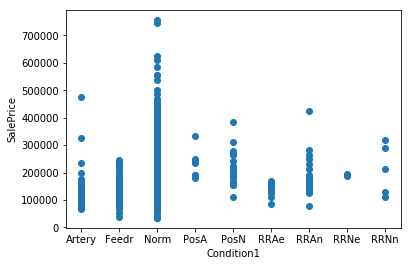

In [223]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

Some conditions like Norm, Feedr and Artery do influence the Sale Price in their own independent manner <br>
However, other values have same impact on Sale Price. So doing One-Hot Encoding and seperating All of them will create a unnecssary spase vector making it more difficult for our machine learning model to learn<br>

Therefore we will combined the values right to Norm (in the figure)

In [234]:
rare = (combined[variable].value_counts() < 70)
combined[variable] = combined[variable].apply(lambda x: 'Others' if rare.loc[x] == True else x)

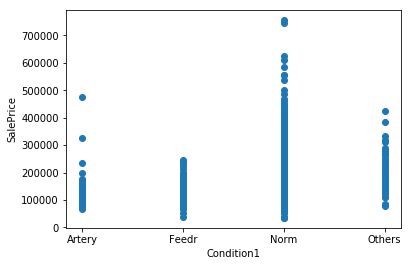

In [237]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

This is a nominal variable

In [238]:
One_Hot_Encoding(variable)

# 13: Condition2

In [243]:
variable = 'Condition2'

In [240]:
Exploration(variable)

The number of unique value in the dataset is/are,  8
There are 0 missing records
Total number of records are  2919


In [241]:
combined.Condition2.unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [244]:
combined[variable].value_counts()

Norm      2889
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

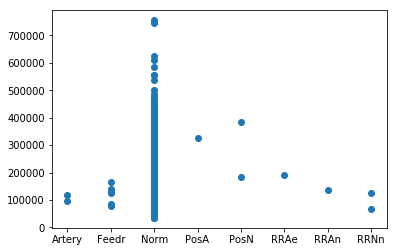

In [245]:
plt.scatter(combined[variable],combined[target])

In [246]:
rare = (combined[variable].value_counts() < 10)
combined[variable] = combined[variable].apply(lambda x: 'Others' if rare.loc[x] == True else x)

In [247]:
One_Hot_Encoding(variable)

# 14: BldfType

In [248]:
variable = 'BldgType'

In [249]:
Exploration('BldgType')

The number of unique value in the dataset is/are,  5
There are 0 missing records
Total number of records are  2919


In [250]:
combined.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [251]:
combined[variable].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

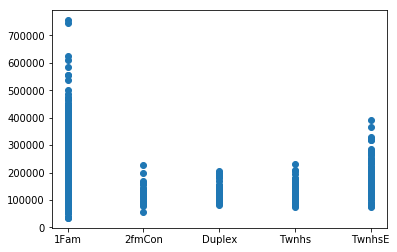

In [254]:
plt.scatter(combined[variable],combined[target])
plt.show()

In [257]:
combined[combined[variable] == '2fmCon'][variable].describe()
combined[combined[variable] == 'Duplex'][variable].describe()
combined[combined[variable] == 'Twnhs'][variable].describe()
#combined[combined[variable] == '2fmCon'][variable].describe()

KeyError: 'BldgType'

In [255]:
One_Hot_Encoding(variable)

# 15: HouseStyle

In [258]:
variable = 'HouseStyle'

In [259]:
Exploration(variable)

The number of unique value in the dataset is/are,  8
There are 0 missing records
Total number of records are  2919


In [260]:
combined.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

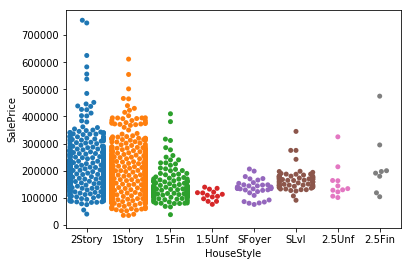

In [265]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

__Note__ <br>
We need to dig deeper to understand the relationship. <br>
Keeping it on hold. <br>
Performing Label Encoding currently <br>

In [268]:
combined[variable][combined[variable] == '1Story'] = 1
combined[variable][combined[variable] == '1.5Fin'] = 2
combined[variable][combined[variable] == '1.5Unf'] = 3
combined[variable][combined[variable] == '2Story'] = 4
combined[variable][combined[variable] == '2.5Fin'] = 5
combined[variable][combined[variable] == '2.5Unf'] = 6
combined[variable][combined[variable] == 'SFoyer'] = 7
combined[variable][combined[variable] == 'SLvl'] = 8

In [274]:
mean = combined[variable].unique().mean()
combined[variable] = combined[variable] - mean

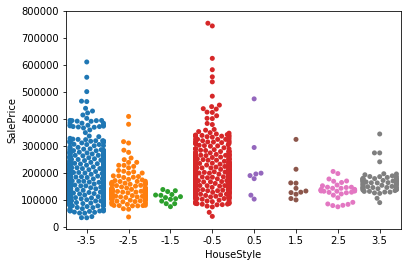

In [279]:
variable = 'HouseStyle'
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

# 16: OverallQual

In [281]:
variable = 'OverallQual'

In [276]:
Exploration(variable)

The number of unique value in the dataset is/are,  10
There are 0 missing records
Total number of records are  2919


In [277]:
combined.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [278]:
combined.OverallQual.value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

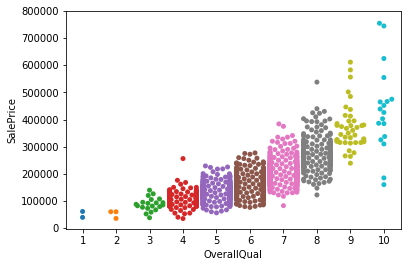

In [282]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

This is a correctly labelled encoder. We do not need to perform any transformations

__Note:__ You can perform logarithmic transformation to convert exponential into linearities

# 17 OverallCond

In [285]:
variable = 'OverallCond'

In [286]:
Exploration(variable)

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [287]:
combined.OverallCond.unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1])

In [288]:
combined.OverallCond.value_counts()

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

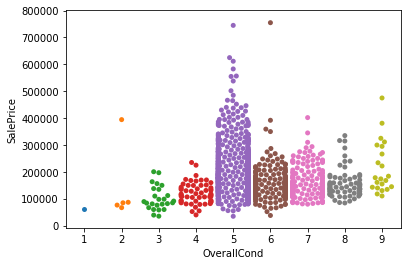

In [289]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

# 18 YearBuilt

In [290]:
variable = 'YearBuilt'

In [291]:
Exploration(variable)

The number of unique value in the dataset is/are,  118
There are 0 missing records
Total number of records are  2919


In [292]:
combined.YearBuilt.unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905, 1907, 1896, 1902, 1895, 1879, 1901])

In [293]:
combined.YearBuilt.value_counts()

2005    142
2006    138
2007    109
2004     99
2003     88
1977     57
1920     57
1976     54
1999     52
2008     49
1958     48
2000     48
2002     47
1998     46
1968     45
1959     43
1954     43
1910     43
1970     42
1967     41
1972     40
1956     39
1971     39
1978     39
1993     39
1950     38
1994     37
1960     37
1940     36
1966     35
       ... 
1982      7
1931      7
1985      7
1942      6
1912      5
1919      5
1932      5
1880      5
1934      5
2010      3
1905      3
1895      3
1917      3
1908      2
1885      2
1901      2
1892      2
1882      1
1896      1
1898      1
1902      1
1907      1
1904      1
1906      1
1913      1
1911      1
1875      1
1879      1
1893      1
1872      1
Name: YearBuilt, Length: 118, dtype: int64

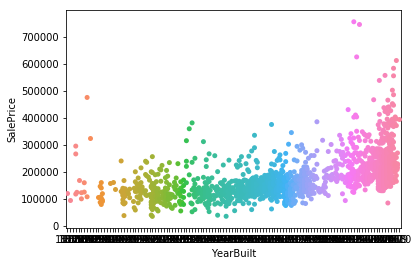

In [294]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

In [298]:
Scaling(variable)

In [302]:
combined[[variable,target]].corr()

,YearBuilt,SalePrice
YearBuilt,1.000000,0.522897
SalePrice,0.522897,1.000000


Although, correlation is not causation, correlation represents strong chances of causations

# 19 YearRemodAdd

In [303]:
variable = 'YearRemodAdd'

In [304]:
Exploration(variable)

The number of unique value in the dataset is/are,  61
There are 0 missing records
Total number of records are  2919


In [305]:
combined.YearRemodAdd.unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974])

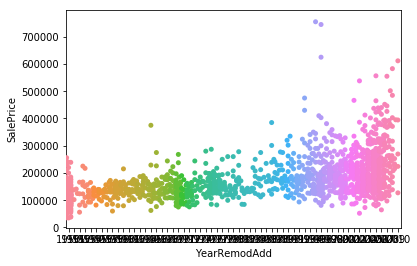

In [307]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

In [308]:
Scaling(variable)

# 20 RoofStyle

In [309]:
variable = 'RoofStyle'

In [311]:
Exploration(variable)

The number of unique value in the dataset is/are,  6
There are 0 missing records
Total number of records are  2919


In [312]:
combined.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

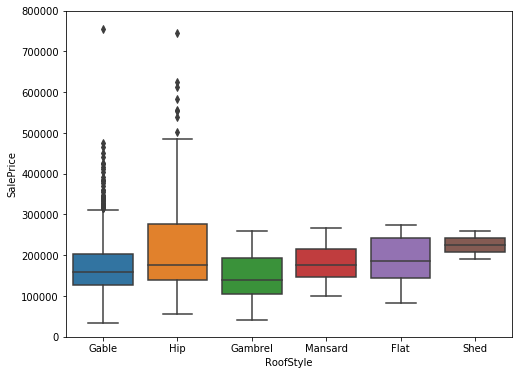

In [313]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=variable, y=target, data=combined)
fig.axis(ymin=0, ymax=800000);

Does not show any signs of ordinal categorical <br>
Let's explore more

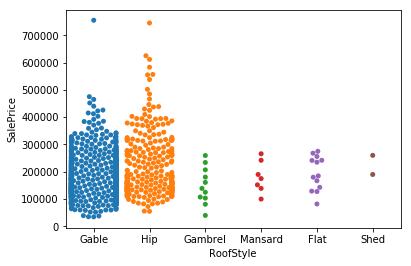

In [314]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

In [315]:
One_Hot_Encoding(variable)

# 21 RoofMatl

In [316]:
variable = 'RoofMatl'

In [317]:
Exploration(variable)

The number of unique value in the dataset is/are,  8
There are 0 missing records
Total number of records are  2919


In [318]:
combined.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

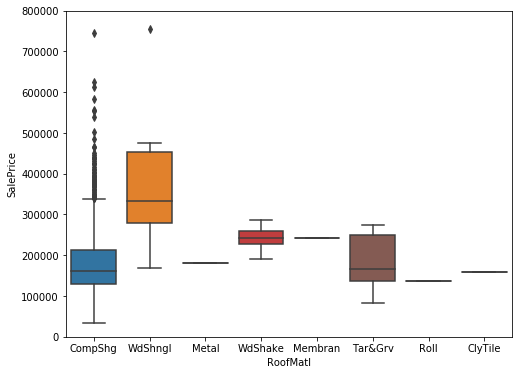

In [319]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=variable, y=target, data=combined)
fig.axis(ymin=0, ymax=800000);

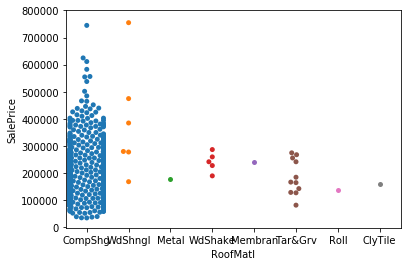

In [320]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

It seems that number of values for categories apart from CompShg is very less <br>
Let's verify

In [321]:
combined[variable].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

Let's keep first 4 and combine others

In [322]:
rare = (combined[variable].value_counts() < 5)
combined[variable] = combined[variable].apply(lambda x: 'Others' if rare.loc[x] == True else x)

In [323]:
One_Hot_Encoding(variable)

# 22 Exterior1st

In [324]:
variable = 'Exterior1st'

In [325]:
Exploration(variable)

The number of unique value in the dataset is/are,  16
There are 1 missing records
Total number of records are  2919


In [326]:
combined.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

We will replace with the mode itself

In [327]:
combined['Exterior1st'][combined['Exterior1st'].isnull()] = 'VinylSd'

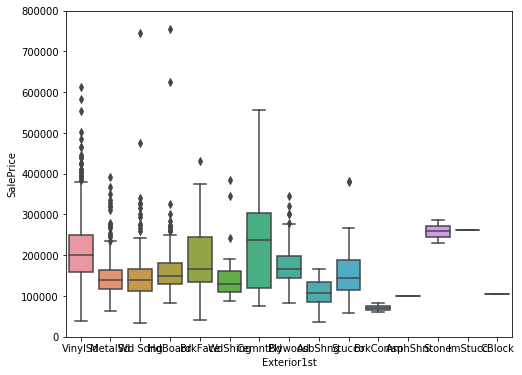

In [328]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=variable, y=target, data=combined)
fig.axis(ymin=0, ymax=800000);

In [329]:
One_Hot_Encoding(variable)

# 23 Exterior2nd

In [330]:
variable = 'Exterior2nd'

In [331]:
Exploration(variable)

The number of unique value in the dataset is/are,  17
There are 1 missing records
Total number of records are  2919


In [332]:
combined.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [333]:
combined['Exterior2nd'][combined['Exterior2nd'].isnull()] = 'VinylSd'

In [334]:
One_Hot_Encoding(variable)

# 23 MasVnrType

In [335]:
variable = 'MasVnrType'

In [336]:
Exploration(variable)

The number of unique value in the dataset is/are,  5
There are 24 missing records
Total number of records are  2919


In [337]:
combined.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [338]:
combined['MasVnrType'][combined['MasVnrType'].isnull()] ='None'

In [339]:
combined.MasVnrType.value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

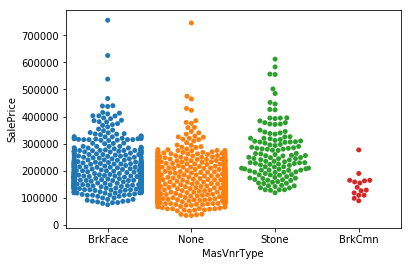

In [340]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

In [341]:
One_Hot_Encoding(variable)

# 24: MasVnrArea

In [355]:
variable = 'MasVnrArea'

In [343]:
Exploration(variable)

The number of unique value in the dataset is/are,  445
There are 23 missing records
Total number of records are  2919


In [344]:
combined.MasVnrArea.value_counts()

0.0       1738
120.0       15
176.0       13
200.0       13
216.0       12
180.0       12
144.0       11
72.0        11
108.0       11
16.0        11
340.0       10
80.0         9
210.0        9
128.0        9
196.0        9
256.0        8
178.0        8
40.0         8
302.0        8
170.0        8
132.0        8
260.0        7
300.0        7
203.0        7
186.0        7
456.0        7
420.0        7
50.0         7
252.0        7
106.0        7
          ... 
81.0         1
528.0        1
91.0         1
87.0         1
97.0         1
63.0         1
408.0        1
47.0         1
39.0         1
118.0        1
1170.0       1
376.0        1
584.0        1
322.0        1
634.0        1
532.0        1
1290.0       1
519.0        1
287.0        1
571.0        1
435.0        1
886.0        1
237.0        1
738.0        1
1050.0       1
664.0        1
247.0        1
550.0        1
137.0        1
572.0        1
Name: MasVnrArea, Length: 444, dtype: int64

In [346]:
combined[variable][combined['MasVnrType_None'] == 1] = 0

In [347]:
Exploration(variable)

The number of unique value in the dataset is/are,  443
There are 0 missing records
Total number of records are  2919


Boo yeah! :D 

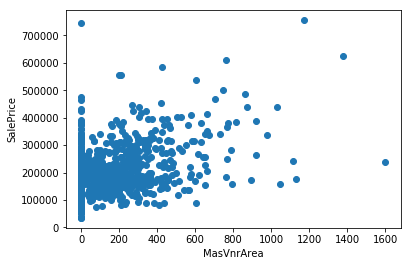

In [350]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

In [357]:
Scaling(variable)

# 25: ExterQual

In [359]:
variable = 'ExterQual'

In [352]:
Exploration(variable)

The number of unique value in the dataset is/are,  4
There are 0 missing records
Total number of records are  2919


In [353]:
combined.ExterQual.value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

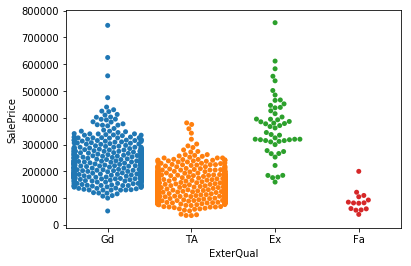

In [354]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

In [360]:
combined[variable][combined[variable] == 'Ex'] = 1
combined[variable][combined[variable] == 'Gd'] = 2
combined[variable][combined[variable] == 'TA'] = 3
combined[variable][combined[variable] == 'Fa'] = 4
combined[variable][combined[variable] == 'Po'] = 4
mean = combined[variable].mean()
combined[variable] = combined[variable] - mean

# 26: ExterCond

In [361]:
variable = 'ExterCond'

In [362]:
Exploration(variable)

The number of unique value in the dataset is/are,  5
There are 0 missing records
Total number of records are  2919


In [363]:
combined.ExterCond.value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

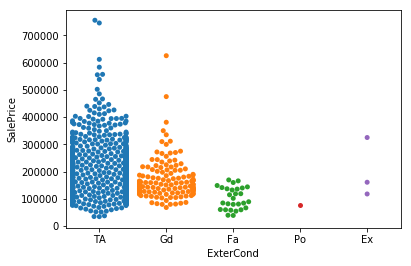

In [364]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

In [365]:
combined[variable][combined[variable] == 'Ex'] = 1
combined[variable][combined[variable] == 'Gd'] = 2
combined[variable][combined[variable] == 'TA'] = 3
combined[variable][combined[variable] == 'Fa'] = 4
combined[variable][combined[variable] == 'Po'] = 4
mean = combined[variable].mean()
combined[variable] = combined[variable] - mean

# 27: Foundation

In [367]:
variable = 'Foundation'

In [368]:
Exploration(variable)

The number of unique value in the dataset is/are,  6
There are 0 missing records
Total number of records are  2919


In [369]:
combined.Foundation.value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

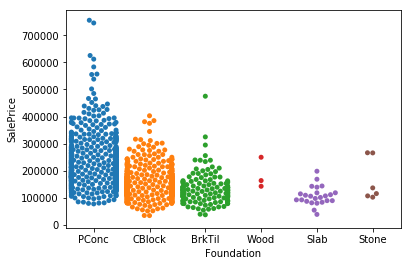

In [370]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

In [371]:
combined[variable][combined[variable] == 'BrkTil'] = 1
combined[variable][combined[variable] == 'CBlock'] = 2
combined[variable][combined[variable] == 'PConc'] = 3
combined[variable][combined[variable] == 'Slab'] = 4
combined[variable][combined[variable] == 'Stone'] = 5
combined[variable][combined[variable] == 'Wood'] = 6
mean = combined[variable].mean()
combined[variable] = combined[variable] - mean

# 28: BsmtQual

In [380]:
variable = 'BsmtQual'

In [374]:
Exploration(variable)

The number of unique value in the dataset is/are,  5
There are 81 missing records
Total number of records are  2919


In [375]:
combined.BsmtQual.value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [376]:
combined[variable][combined[variable].isnull()] = 'None'

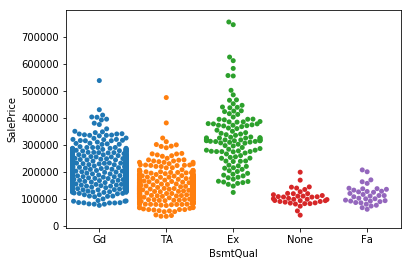

In [377]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

In [378]:
combined[variable][combined[variable] == 'Ex'] = 1
combined[variable][combined[variable] == 'Gd'] = 2
combined[variable][combined[variable] == 'TA'] = 3
combined[variable][combined[variable] == 'Fa'] = 4
combined[variable][combined[variable] == 'Po'] = 5
combined[variable][combined[variable] == 'None'] = 6
mean = combined[variable].mean()
combined[variable] = combined[variable] - mean

# 29: BsmtCond

In [448]:
variable = 'BsmtCond'

In [416]:
Exploration(variable)

The number of unique value in the dataset is/are,  5
There are 82 missing records
Total number of records are  2919


In [417]:
combined.BsmtCond.value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [439]:
combined[variable][combined['BsmtQual'] == combined['BsmtQual'].unique().max()] = 'None'

In [440]:
combined[variable].value_counts()

TA      2605
Gd       122
Fa       103
None      81
Po         5
Name: BsmtCond, dtype: int64

In [442]:
Exploration(variable)

The number of unique value in the dataset is/are,  6
There are 3 missing records
Total number of records are  2919


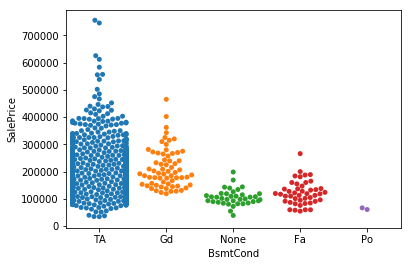

In [449]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

In [452]:
combined[variable][combined[variable] == 'Ex'] = 1
combined[variable][combined[variable] == 'Gd'] = 2
combined[variable][combined[variable] == 'TA'] = 3
combined[variable][combined[variable] == 'Fa'] = 4
combined[variable][combined[variable] == 'Po'] = 5
combined[variable][combined[variable] == 'None'] = 6

In [454]:
yolo = combined[combined[variable].notnull()]

In [461]:
yolo[['BsmtQual',variable]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 1458
Data columns (total 2 columns):
BsmtQual    2916 non-null object
BsmtCond    2916 non-null object
dtypes: object(2)
memory usage: 148.3+ KB


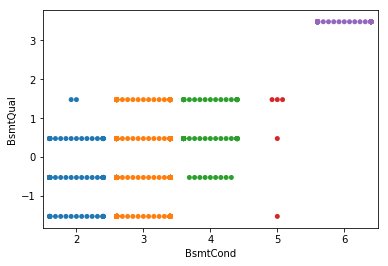

In [462]:
sns.swarmplot(x=variable, y='BsmtQual', data=yolo)
plt.show()

In [463]:
del yolo

In [467]:
combined[combined[variable].isnull()][[variable,'BsmtQual']]

,BsmtCond,BsmtQual
580,NaN,-0.522439
725,NaN,0.477561
1064,NaN,0.477561


In [470]:
combined[variable][combined[variable].isnull()] = 3

# 30: BsmtExposure

In [472]:
variable = 'BsmtExposure'

In [473]:
Exploration(variable)

The number of unique value in the dataset is/are,  5
There are 82 missing records
Total number of records are  2919


In [474]:
combined.BsmtExposure.value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [478]:
combined[variable][combined['BsmtQual'] == combined['BsmtQual'].unique().max()] = 'None'

In [479]:
Exploration(variable)

The number of unique value in the dataset is/are,  6
There are 3 missing records
Total number of records are  2919


In [480]:
combined.BsmtExposure.value_counts()

No      1902
Av       418
Gd       276
Mn       239
None      81
Name: BsmtExposure, dtype: int64

In [482]:
combined[['BsmtQual','BsmtCond','BsmtExposure']][combined[variable].isnull()]

,BsmtQual,BsmtCond,BsmtExposure
948,-0.522439,3,NaN
27,-0.522439,3,NaN
888,-0.522439,3,NaN


In [483]:
yolo = combined[combined[variable].notnull()]

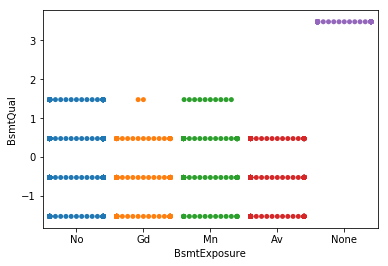

In [484]:
sns.swarmplot(x=variable, y='BsmtQual', data=yolo)
plt.show()

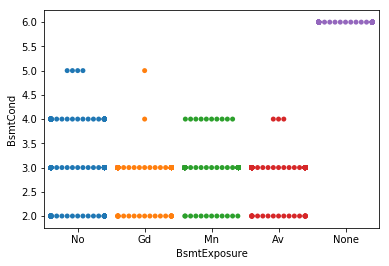

In [485]:
sns.swarmplot(x=variable, y='BsmtCond', data=yolo)
plt.show()

In [486]:
del yolo

In [487]:
combined[variable][combined[variable].isnull()] = 'Gd'

In [491]:
combined[variable].value_counts()

No      1902
Av       418
Gd       279
Mn       239
None      81
Name: BsmtExposure, dtype: int64

In [492]:
combined[variable][combined[variable] == 'None'] = 1
combined[variable][combined[variable] == 'No'] = 2
combined[variable][combined[variable] == 'Mn'] = 3
combined[variable][combined[variable] == 'Av'] = 4
combined[variable][combined[variable] == 'Gd'] = 5

In [494]:
mean = combined[variable].unique().mean()
combined[variable] = combined[variable] - mean

# 31: BsmtFinType1

In [496]:
variable = 'BsmtFinType1'

In [497]:
Exploration(variable)

The number of unique value in the dataset is/are,  7
There are 79 missing records
Total number of records are  2919


In [498]:
combined[variable].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [499]:
combined[variable][combined['BsmtQual'] == combined['BsmtQual'].unique().max()] = 'None'

In [500]:
Exploration(variable)

The number of unique value in the dataset is/are,  7
There are 0 missing records
Total number of records are  2919


In [501]:
combined[variable].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'None', 'LwQ'], dtype=object)

In [503]:
combined[variable][combined[variable] == 'None'] = 1
combined[variable][combined[variable] == 'Unf'] = 2
combined[variable][combined[variable] == 'LwQ'] = 3
combined[variable][combined[variable] == 'Rec'] = 4
combined[variable][combined[variable] == 'BLQ'] = 5
combined[variable][combined[variable] == 'ALQ'] = 6
combined[variable][combined[variable] == 'GLQ'] = 7
mean = combined[variable].unique().mean()
combined[variable] = combined[variable] - mean

# 32: BsmtFinSF1

In [504]:
Exploration('BsmtFinSF1')

The number of unique value in the dataset is/are,  992
There are 1 missing records
Total number of records are  2919


In [506]:
combined['BsmtFinSF1'][combined['BsmtFinSF1'].isnull()] = 0

In [507]:
Scaling(variable)

# 33:BsmtFinType2

In [521]:
variable = 'BsmtFinType2'

In [509]:
Exploration(variable)

The number of unique value in the dataset is/are,  7
There are 80 missing records
Total number of records are  2919


In [510]:
combined[variable].value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [511]:
combined[variable][combined['BsmtQual'] == combined['BsmtQual'].unique().max()] = 'None'

In [512]:
Exploration(variable)

The number of unique value in the dataset is/are,  8
There are 1 missing records
Total number of records are  2919


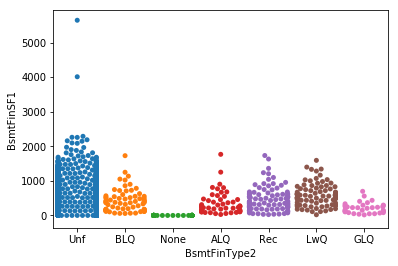

In [517]:
yolo = combined[combined[variable].notnull()][[variable,'BsmtFinSF1']]
sns.swarmplot(x=variable, y='BsmtFinSF1', data=yolo)
plt.show()

In [520]:
combined[combined['BsmtFinType2'].isnull()]['BsmtFinSF1']

332    1124.0
Name: BsmtFinSF1, dtype: float64

In [522]:
combined[variable][combined[variable].isnull()] = 'Unf'

In [523]:
combined[variable].unique()

array(['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [524]:
combined[variable][combined[variable] == 'None'] = 1
combined[variable][combined[variable] == 'Unf'] = 2
combined[variable][combined[variable] == 'LwQ'] = 3
combined[variable][combined[variable] == 'Rec'] = 4
combined[variable][combined[variable] == 'BLQ'] = 5
combined[variable][combined[variable] == 'ALQ'] = 6
combined[variable][combined[variable] == 'GLQ'] = 7
mean = combined[variable].unique().mean()
combined[variable] = combined[variable] - mean

# 34: BsmtUnfSF

In [526]:
variable = 'BsmtUnfSF'

In [527]:
Exploration(variable)

The number of unique value in the dataset is/are,  1136
There are 1 missing records
Total number of records are  2919


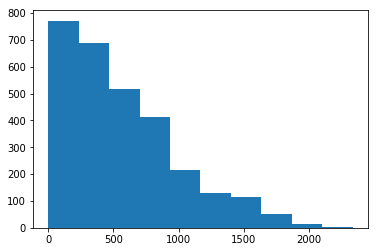

In [531]:
plt.hist(combined[combined[variable].notnull()][variable])
plt.show()

In [532]:
combined[variable][combined[variable].isnull()] = 0

# 35:TotalBsmtSF

In [533]:
variable = 'TotalBsmtSF'

In [534]:
Exploration(variable)

The number of unique value in the dataset is/are,  1059
There are 1 missing records
Total number of records are  2919


In [535]:
combined.TotalBsmtSF.value_counts()

0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
768.0     24
816.0     23
728.0     20
1008.0    19
780.0     19
384.0     19
960.0     18
894.0     17
756.0     17
832.0     17
546.0     16
936.0     16
720.0     16
600.0     16
848.0     16
483.0     14
630.0     13
952.0     13
840.0     13
988.0     12
624.0     12
876.0     11
784.0     11
796.0     11
1056.0    10
          ..
1967.0     1
1905.0     1
1679.0     1
1533.0     1
2140.0     1
1994.0     1
1378.0     1
763.0      1
1047.0     1
1376.0     1
904.0      1
370.0      1
1570.0     1
2033.0     1
1709.0     1
1519.0     1
2077.0     1
1550.0     1
797.0      1
699.0      1
559.0      1
396.0      1
1866.0     1
1641.0     1
961.0      1
1949.0     1
1231.0     1
1829.0     1
1475.0     1
1243.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64

In [536]:
combined.BsmtUnfSF.median()

467.0

In [537]:
combined.TotalBsmtSF.describe()

count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

The skewness of the data is  1.1628824745982715
The skewness of the data is  9.151099191365313


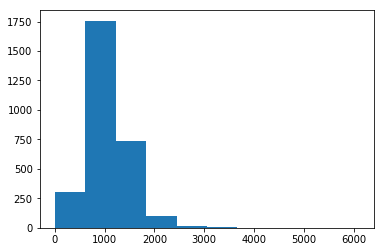

In [538]:
print('The skewness of the data is ',combined['TotalBsmtSF'].skew())
print('The skewness of the data is ',combined['TotalBsmtSF'].kurtosis())

plt.hist(combined['TotalBsmtSF'][combined['TotalBsmtSF'].notnull()])
plt.show()

In [539]:
combined['TotalBsmtSF'][combined['TotalBsmtSF'].isnull()] = combined.BsmtUnfSF.median()

# 36: Heating

In [540]:
variable = 'Heating'

In [541]:
Exploration('Heating')

The number of unique value in the dataset is/are,  6
There are 0 missing records
Total number of records are  2919


In [542]:
combined.Heating.unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

__Note__ Check if ordinal or nominal variable

In [545]:
One_Hot_Encoding(variable)

# 37: HeatingQC

In [546]:
variable = 'HeatingQC'

In [547]:
Exploration(variable)

The number of unique value in the dataset is/are,  5
There are 0 missing records
Total number of records are  2919


In [548]:
combined.HeatingQC.value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [549]:
combined[variable][combined[variable] == 'Ex'] = 1
combined[variable][combined[variable] == 'Gd'] = 2
combined[variable][combined[variable] == 'TA'] = 3
combined[variable][combined[variable] == 'Fa'] = 4
combined[variable][combined[variable] == 'Po'] = 5
mean = combined[variable].unique().mean()
combined[variable] = combined[variable] - mean

# 38: CentralAir

In [550]:
variable = 'CentralAir'

In [551]:
Exploration(variable)

The number of unique value in the dataset is/are,  2
There are 0 missing records
Total number of records are  2919


In [552]:
combined.CentralAir.value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

In [553]:
combined[variable][combined[variable] == 'Y'] = -0.5
combined[variable][combined[variable] == 'N'] = 0.5
mean = combined[variable].unique().mean()
combined[variable] = combined[variable] - mean

# 39: Electrical

In [554]:
variable = 'Electrical'

In [555]:
Exploration(variable)

The number of unique value in the dataset is/are,  6
There are 1 missing records
Total number of records are  2919


In [556]:
combined.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [558]:
combined['Electrical'][combined['Electrical'].isnull()] = 'SBrkr'

In [559]:
One_Hot_Encoding(variable)

# 40: 1stFlrSF

In [563]:
variable = '1stFlrSF'

In [564]:
Exploration(variable)

The number of unique value in the dataset is/are,  1083
There are 0 missing records
Total number of records are  2919


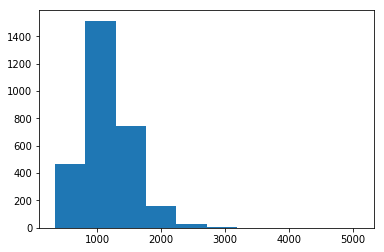

In [567]:
plt.hist(combined[variable])
plt.show()

In [568]:
Scaling(variable)

# 41: 2ndFlrSF

In [570]:
variable = '2ndFlrSF'

In [571]:
Exploration(variable)

The number of unique value in the dataset is/are,  635
There are 0 missing records
Total number of records are  2919


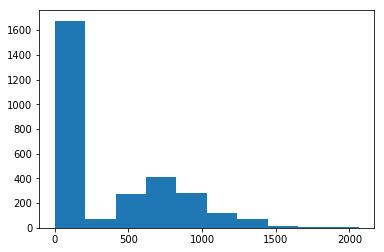

In [572]:
plt.hist(combined[variable])
plt.show()

Seems like very few have 2nd floor

In [575]:
print('There are ',len(combined[combined[variable] > 0][variable]),' records having more than one floor')

There are  1251  records having more than one floor


Let us see how the distribution is for houses with 2nd floor

The skewness of  2ndFlrSF  is  0.8621178325657642
The kurtosis of  2ndFlrSF  is  -0.4222606698937579


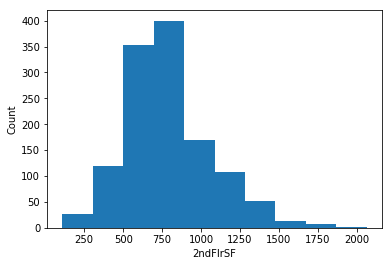

In [578]:
print('The skewness of ',variable, ' is ', combined[variable].skew())
print('The kurtosis of ',variable, ' is ', combined[variable].kurtosis())
plt.hist(combined[combined[variable]>0][variable])
plt.xlabel(variable)
plt.ylabel('Count')
plt.show()

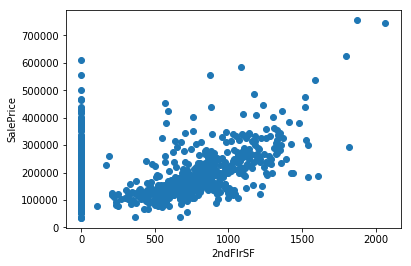

In [580]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

Let us make a new coloumn where we mention if 2nd floor is present or not

In [581]:
combined['2nd_Floor_Present'] = 1
combined['2nd_Floor_Present'][combined[variable] == 0] = 0

In [582]:
Scaling(variable)

# LowQualFinSF

In [584]:
variable = 'LowQualFinSF'

In [585]:
Exploration(variable)

The number of unique value in the dataset is/are,  36
There are 0 missing records
Total number of records are  2919


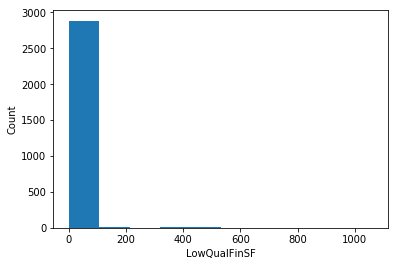

In [587]:
plt.hist(combined[variable])
plt.xlabel(variable)
plt.ylabel('Count')
plt.show()

In [589]:
combined[variable].value_counts()

0       2879
80         4
205        2
360        2
390        1
384        1
362        1
312        1
234        1
232        1
420        1
156        1
144        1
140        1
120        1
114        1
108        1
392        1
697        1
515        1
371        1
513        1
481        1
479        1
473        1
431        1
397        1
259        1
450        1
53         1
1064       1
572        1
528        1
514        1
512        1
436        1
Name: LowQualFinSF, dtype: int64

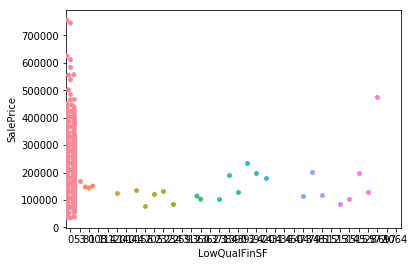

In [590]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

The influence of area is very less. <br>
So let us categorize the column

In [591]:
combined[variable][combined[variable]>0] = 1

# GrLivArea

In [593]:
variable = 'GrLivArea'

In [594]:
Exploration(variable)

The number of unique value in the dataset is/are,  1292
There are 0 missing records
Total number of records are  2919


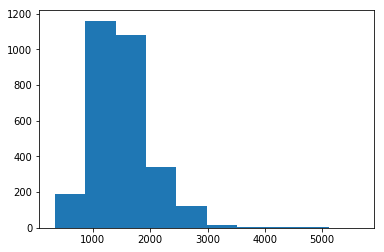

In [596]:
plt.hist(combined[variable])
plt.show()

In [597]:
Scaling(variable)

# BsmtFullBath

In [598]:
variable = 'BsmtFullBath'

In [599]:
Exploration(variable)

The number of unique value in the dataset is/are,  5
There are 2 missing records
Total number of records are  2919


In [601]:
combined[variable].unique()

array([ 1.,  0.,  2.,  3., nan])

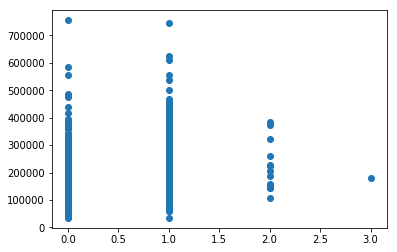

In [603]:
plt.scatter(combined[variable],combined[target])
plt.show()

We treat this as a nominal variable

In [605]:
combined[variable].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [611]:
combined[variable].unique()

array([ 0.,  1.,  2., nan])

In [606]:
combined[variable][combined[variable].isnull()] = 0

In [607]:
combined[variable].value_counts()

0.0    1707
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [608]:
One_Hot_Encoding(variable)

# BsmtHalfBath

In [609]:
variable = 'BsmtHalfBath'

In [610]:
Exploration(variable)

The number of unique value in the dataset is/are,  4
There are 2 missing records
Total number of records are  2919


In [613]:
combined[variable].unique()

array([ 0.,  1.,  2., nan])

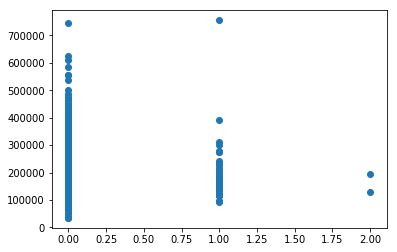

In [614]:
plt.scatter(combined[variable],combined[target])
plt.show()

In [615]:
combined[variable].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [616]:
combined[variable][combined[variable].isnull()] = 0

In [617]:
combined[variable].value_counts()

0.0    2744
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

# FullBath

In [618]:
variable = 'FullBath'

In [619]:
Exploration(variable)

The number of unique value in the dataset is/are,  5
There are 0 missing records
Total number of records are  2919


In [620]:
combined[variable].value_counts()

2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

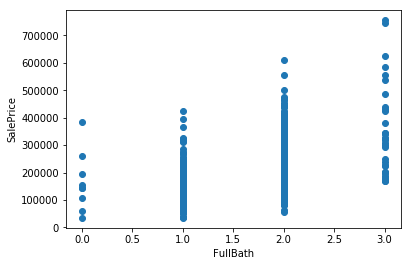

In [623]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

This is an ordinal categorical variable

In [624]:
mean = combined[variable].unique().mean()
combined[variable] = combined[variable] - mean

# HalfBath

In [625]:
variable = 'HalfBath'

In [626]:
Exploration(variable)

The number of unique value in the dataset is/are,  3
There are 0 missing records
Total number of records are  2919


In [627]:
combined[variable].value_counts()

0    1834
1    1060
2      25
Name: HalfBath, dtype: int64

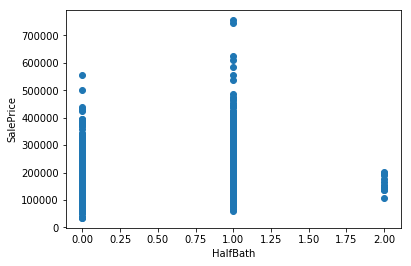

In [628]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

This seems like a nominal categorical variable

In [629]:
One_Hot_Encoding(variable)

# BedroomAbvGr

In [635]:
variable = 'BedroomAbvGr'

In [636]:
Exploration(variable)

The number of unique value in the dataset is/are,  8
There are 0 missing records
Total number of records are  2919


In [637]:
combined[variable].value_counts()

3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64

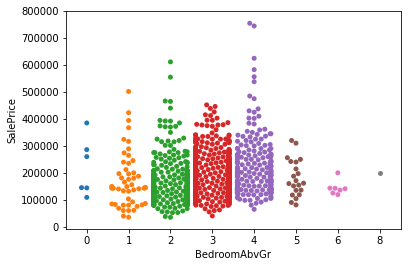

In [640]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

In [642]:
combined[[variable,target]].corr()

,BedroomAbvGr,SalePrice
BedroomAbvGr,1.000000,0.168213
SalePrice,0.168213,1.000000


In [654]:
median_list

[[3, 169945.0],
 [4, 193500.0],
 [1, 145250.0],
 [2, 137250.0],
 [0, 202500.0],
 [5, 161500.0],
 [6, 141000.0],
 [8, 200000.0]]

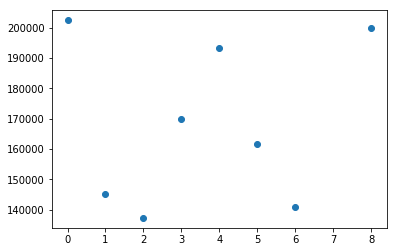

In [655]:
lis = combined[variable].unique()
median_variable = []
median_target = []
for i in lis:
    median_variable.append(i)
    median_target.append(combined[target][combined[variable]==i].median())
plt.scatter(median_variable,median_target)
plt.show()

no correlation when comparing medians

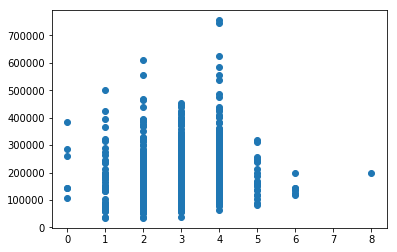

In [656]:
plt.scatter(combined[variable],combined[target])

Let's conclude with a ordinal variable

In [657]:
mean = combined[variable].unique().mean()
combined[variable] = combined[variable] - mean

# Kitchen

In [661]:
variable = 'KitchenAbvGr'

In [662]:
Exploration(variable)

The number of unique value in the dataset is/are,  4
There are 0 missing records
Total number of records are  2919


In [663]:
combined[variable].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

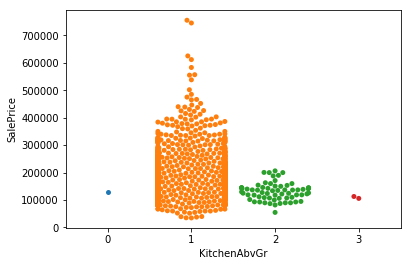

In [664]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

There aren't sufficient values for 0 and 3. <br>
We merge the two values

In [665]:
combined[variable][combined[variable] == 3] = 0

In [666]:
combined[[variable,target]].corr()

,KitchenAbvGr,SalePrice
KitchenAbvGr,1.000000,-0.124008
SalePrice,-0.124008,1.000000


In [667]:
median_list

[[3, 169945.0],
 [4, 193500.0],
 [1, 145250.0],
 [2, 137250.0],
 [0, 202500.0],
 [5, 161500.0],
 [6, 141000.0],
 [8, 200000.0]]

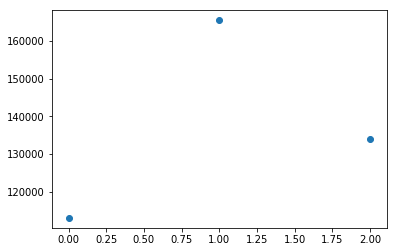

In [668]:
lis = combined[variable].unique()
median_variable = []
median_target = []
for i in lis:
    median_variable.append(i)
    median_target.append(combined[target][combined[variable]==i].median())
plt.scatter(median_variable,median_target)
plt.show()

no correlation when comparing medians

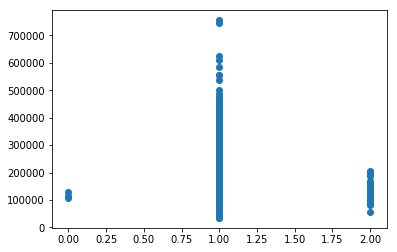

In [669]:
plt.scatter(combined[variable],combined[target])

We conclude with nominal variable

In [670]:
One_Hot_Encoding(variable)

# KitchenQual

In [671]:
variable = 'KitchenQual'

In [672]:
Exploration(variable)

The number of unique value in the dataset is/are,  5
There are 1 missing records
Total number of records are  2919


In [674]:
combined[variable].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [675]:
combined[variable][combined[variable]isnull()] = 'TA'

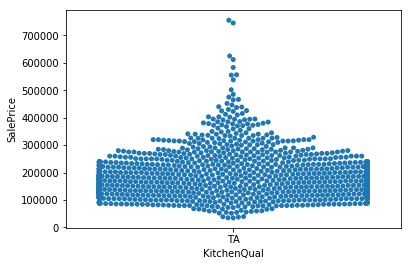

In [677]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

There aren't sufficient values for 0 and 3. <br>
We merge the two values

In [665]:
combined[variable][combined[variable] == 3] = 0

In [666]:
combined[[variable,target]].corr()

,KitchenAbvGr,SalePrice
KitchenAbvGr,1.000000,-0.124008
SalePrice,-0.124008,1.000000


In [667]:
median_list

[[3, 169945.0],
 [4, 193500.0],
 [1, 145250.0],
 [2, 137250.0],
 [0, 202500.0],
 [5, 161500.0],
 [6, 141000.0],
 [8, 200000.0]]

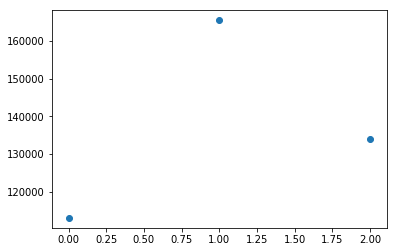

In [668]:
lis = combined[variable].unique()
median_variable = []
median_target = []
for i in lis:
    median_variable.append(i)
    median_target.append(combined[target][combined[variable]==i].median())
plt.scatter(median_variable,median_target)
plt.show()

no correlation when comparing medians

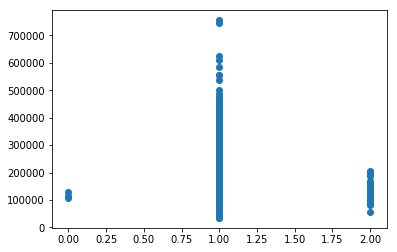

In [669]:
plt.scatter(combined[variable],combined[target])

We conclude with nominal variable

In [670]:
One_Hot_Encoding(variable)

# TotRmsAbvGrd

In [678]:
variable = 'TotRmsAbvGrd'

In [679]:
Exploration(variable)

The number of unique value in the dataset is/are,  14
There are 0 missing records
Total number of records are  2919


In [680]:
combined[variable].value_counts()

6     844
7     649
5     583
8     347
4     196
9     143
10     80
11     32
3      25
12     16
15      1
13      1
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

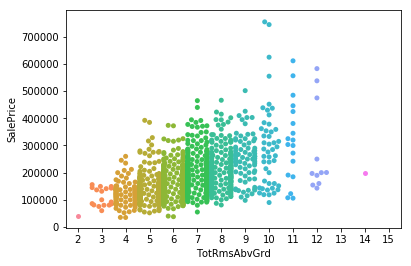

In [681]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

Looks ordinal! :D (I don't know why I get happy when I see a variable to be ordinal)

In [682]:
combined[[variable,target]].corr()

,TotRmsAbvGrd,SalePrice
TotRmsAbvGrd,1.000000,0.533723
SalePrice,0.533723,1.000000


In [683]:
mean = combined[variable].unique().mean()
combined[variable] = combined[variable] - mean

# Functional

In [686]:
variable = 'Functional'

In [687]:
Exploration(variable)

The number of unique value in the dataset is/are,  8
There are 2 missing records
Total number of records are  2919


In [688]:
combined[variable].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

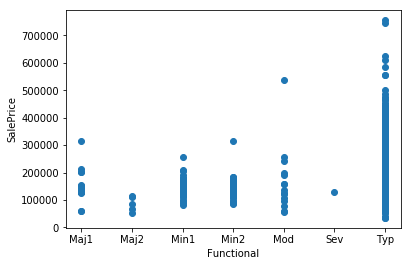

In [689]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

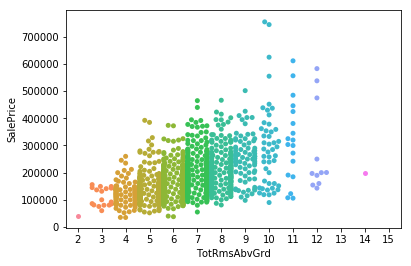

In [681]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

In [691]:
combined[variable].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev', nan],
      dtype=object)

In [692]:
combined[combined[variable] == 'Typ'] = 1
combined[combined[variable] == 'Min1'] = 2
combined[combined[variable] == 'Min2'] = 3
combined[combined[variable] == 'Mod'] = 4
combined[combined[variable] == 'Maj1'] = 5
combined[combined[variable] == 'Maj2'] = 6
combined[combined[variable] == 'Sev'] = 7
combined[combined[variable] == 'Sal'] = 8
mean = combined[variable].unique().mean()
combined[variable] = combined[variable] - mean

# Fireplaces

In [694]:
variable = 'Fireplaces'

In [695]:
Exploration(variable)

The number of unique value in the dataset is/are,  8
There are 0 missing records
Total number of records are  2919


In [696]:
combined[variable].value_counts()

1    2717
3      70
2      65
4      35
5      19
6       9
7       2
0       2
Name: Fireplaces, dtype: int64

In [702]:
mean = combined[variable].unique().mean()
combined[variable] = combined[variable] - mean

# FireplaceQu

In [703]:
variable = 'FireplaceQu'

In [704]:
Exploration(variable)

The number of unique value in the dataset is/are,  8
There are 2 missing records
Total number of records are  2919


In [705]:
combined[variable].value_counts()

1    2717
3      70
2      65
4      35
5      19
6       9
7       2
Name: FireplaceQu, dtype: int64

In [706]:
combined[variable][combined[variable].isnull()] = 1

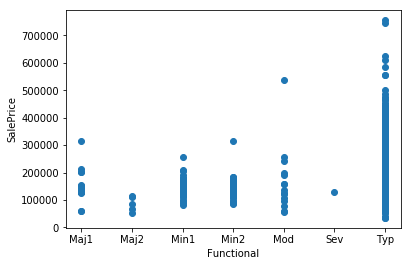

In [689]:
plt.scatter(combined[variable],combined[target])
plt.xlabel(variable)
plt.ylabel(target)
plt.show()

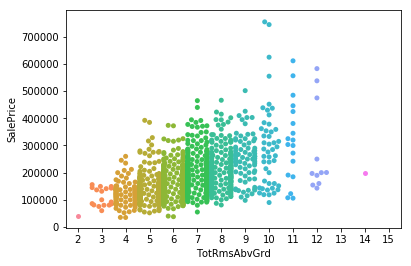

In [681]:
sns.swarmplot(x=variable, y=target, data=combined)
plt.show()

# GarageType

In [708]:
variable = 'GarageType'

In [709]:
Exploration(variable)

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [710]:
combined[variable].value_counts()

1         2717
3           70
2           65
4           35
5           19
6            9
7            2
Detchd       1
Attchd       1
Name: GarageType, dtype: int64

In [711]:
combined[variable].unique()

array([1, 2, 5, 3, 4, 6, 7, 'Attchd', 'Detchd'], dtype=object)

In [712]:
combined[combined[variable] == 'Attchd'] = 0
combined[combined[variable] == 'Detchd'] = -1

# GarageYrBlt

In [717]:
variable = 'GarageYrBlt'

In [718]:
Exploration(variable)

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [719]:
combined[variable].value_counts()

 1.0    2717
 3.0      70
 2.0      65
 4.0      35
 5.0      19
 6.0       9
 7.0       2
-1.0       1
 0.0       1
Name: GarageYrBlt, dtype: int64

# GarageFinish

In [720]:
variable = 'GarageFinish'

In [721]:
Exploration(variable)

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [722]:
combined[variable].value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: GarageFinish, dtype: int64

# GarageCars

In [723]:
variable = 'GarageCars'

In [724]:
Exploration(variable)

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [725]:
combined[variable].value_counts()

 1.0    2717
 3.0      70
 2.0      65
 4.0      35
 5.0      19
 6.0       9
 7.0       2
-1.0       1
 0.0       1
Name: GarageCars, dtype: int64

# GarageQual

In [726]:
variable = 'GarageQual'

In [727]:
Exploration(variable)

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [728]:
combined[variable].value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: GarageQual, dtype: int64

# GarageCond

In [729]:
variable = 'GarageCond'

In [730]:
Exploration(variable)

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [731]:
combined[variable].value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: GarageCond, dtype: int64

# PavedDrive

In [732]:
variable = 'PavedDrive'

In [733]:
Exploration(variable)

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [734]:
combined.PavedDrive.value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: PavedDrive, dtype: int64

This is ordinal type categorical variable

In [735]:
combined.PavedDrive[combined.PavedDrive == 'Y'] = 1
combined.PavedDrive[combined.PavedDrive == 'P'] = 2
combined.PavedDrive[combined.PavedDrive == 'N'] = 3


# WoodDeckSF

In [737]:
variable = 'WoodDeckSF'

In [738]:
Exploration('WoodDeckSF')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [749]:
combined[variable].value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: WoodDeckSF, dtype: int64

# OpenPorchSF

In [750]:
Exploration('OpenPorchSF')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


# EnclosedPorch

In [751]:
Exploration('EnclosedPorch')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


# 3SsnPorch

In [752]:
Exploration('3SsnPorch')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [753]:
combined['3SsnPorch'].value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: 3SsnPorch, dtype: int64

In [754]:
combined['3SsnPorch'][combined['3SsnPorch'] != 0] = 1

# ScreenPorch

In [755]:
Exploration('ScreenPorch')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


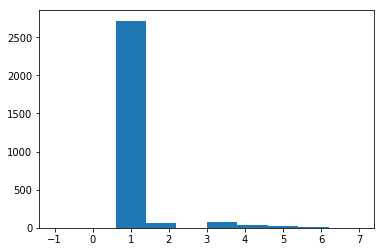

In [756]:
plt.hist(combined['ScreenPorch'])
plt.show()

In [757]:
combined['ScreenPorch'].value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: ScreenPorch, dtype: int64

In [758]:
combined['ScreenPorch'][combined['ScreenPorch'] > 0] = 1

# PoolArea

In [759]:
Exploration('PoolArea')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [760]:
combined.PoolArea.value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: PoolArea, dtype: int64

In [761]:
combined['PoolArea'][combined['PoolArea'] > 0] = 1

# PoolQC

In [762]:
Exploration('PoolQC')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [763]:
combined['PoolQC'][combined['PoolQC'].isnull()] = 0

In [764]:
combined.PoolQC.value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: PoolQC, dtype: int64

In [765]:
combined['PoolQC'][combined['PoolQC'] == 'Fa'] = 1
combined['PoolQC'][combined['PoolQC'] == 'Gd'] = 2
combined['PoolQC'][combined['PoolQC'] == 'Ex'] = 3

# Fence

In [766]:
Exploration('Fence')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [767]:
combined['Fence'][combined['Fence'].isnull()] = 0

In [768]:
combined.Fence.value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: Fence, dtype: int64

In [769]:
combined['Fence'][combined['Fence'] == 'MnWw'] = 1
combined['Fence'][combined['Fence'] == 'GdWo'] = 2
combined['Fence'][combined['Fence'] == 'MnPrv'] = 3
combined['Fence'][combined['Fence'] == 'GdPrv'] = 4

# MiscFeature

In [770]:
Exploration('MiscFeature')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [771]:
combined['MiscFeature'][combined['MiscFeature'].isnull()] ='None'

In [772]:
combined['MiscFeature'].value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: MiscFeature, dtype: int64

In [773]:
One_Hot_Encoding('MiscFeature')

# MiscVal

In [774]:
Exploration('MiscVal')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [775]:
combined['MiscVal'].value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: MiscVal, dtype: int64

In [776]:
#Make a new feature out of Misc Feature and MiscVal
#One Feature that encompassess both the combinations
# Might become a categorical variable with very high number of categories
# Research on what to do in these circumstances

# MoSold

In [777]:
Exploration('MoSold')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [778]:
One_Hot_Encoding('MoSold')

# YrSold

In [779]:
Exploration('YrSold')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [780]:
combined.YrSold.value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: YrSold, dtype: int64

It's evenly distributed. That's good! <br>
Let us just center it around zero

In [781]:
median = combined.YrSold.median()
combined.YrSold = combined.YrSold - median

In [782]:
combined.YrSold.unique()

array([ 0.,  1.,  4.,  2.,  3.,  5.,  6., -1., -2.])

Awesome work

# SaleType

In [783]:
Exploration('SaleType')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [784]:
combined.SaleType.value_counts()

 1    2717
 3      70
 2      65
 4      35
 5      19
 6       9
 7       2
-1       1
 0       1
Name: SaleType, dtype: int64

In [785]:
combined.SaleType[combined.SaleType.isnull()] = 'WD'

In [786]:
One_Hot_Encoding('SaleType')

# Sale Condition

In [787]:
Exploration('SaleCondition')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [788]:
Label_Encoding('SaleCondition')

# Target Variable: SalePrice

In [789]:
combined.SalePrice.describe()

count    2919.000000
mean        1.150737
std         0.641194
min        -1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: SalePrice, dtype: float64

The skewness of the Sale Price is  4.919355590755076
The kurtosis of the Sale Price is  26.807219844325193


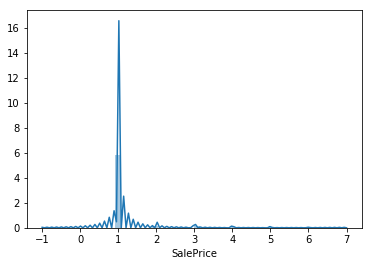

In [790]:
print('The skewness of the Sale Price is ', combined.SalePrice.skew())
print('The kurtosis of the Sale Price is ', combined.SalePrice.kurtosis())
sns.distplot(combined[combined['SalePrice'].notnull()]['SalePrice'])
plt.show()

Trying to Apply Central Limit Theorem

In [ ]:
mean = combined['SalePrice'].mean()
std = combined['SalePrice'].std()
combined['target'] = (combined['SalePrice'] - mean) / std
combined['target'] = (combined['target'] - combined['target'].mean()) / combined['target'].std()
combined['target'] = (combined['target'] - combined['target'].mean()) / combined['target'].std()
combined['target'] = (combined['target'] - combined['target'].mean()) / combined['target'].std()
combined['target'] = (combined['target'] - combined['target'].mean()) / combined['target'].std()
combined['target'] = (combined['target'] - combined['target'].mean()) / combined['target'].std()
plt.hist(combined[combined['target'].notnull()]['target'])
plt.show()

We faied miserably :(